In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='latin1')

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape #11251 rows and 15 column data.

(11251, 15)

# Check null values

In [7]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

# Inference

1. Amount has 12 null values
2. Status has 11251 null values
3. Unnamed1 has 11251 null values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [13]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [15]:
df.dropna(inplace=True) #delete the null value of amount

In [17]:
df.shape

(11239, 13)

In [18]:
#change data type
df['Amount']=df['Amount'].astype('int')

In [19]:
df['Amount'].dtypes

dtype('int32')

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [21]:
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


# EDA Analysis

In [23]:
df['Gender'].value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender wise data')

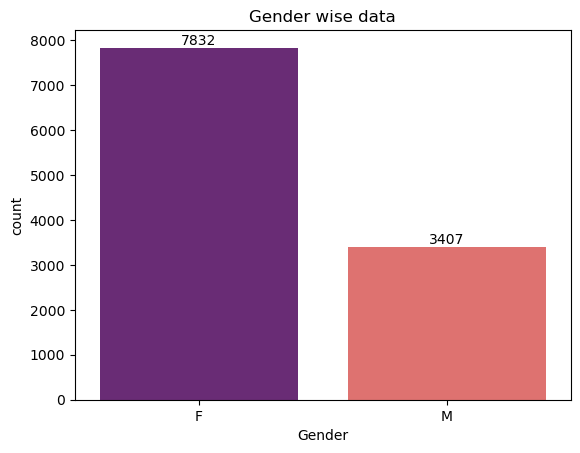

In [32]:
r1=sns.countplot(x='Gender',data=df,palette='magma')
for bars in r1.containers:
    r1.bar_label(bars)
plt.title("Gender wise data")

# Inferences

Female has purchased more than male.

In [35]:
df.groupby(["Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)

,Gender,Amount
0,F,74335853
1,M,31913276


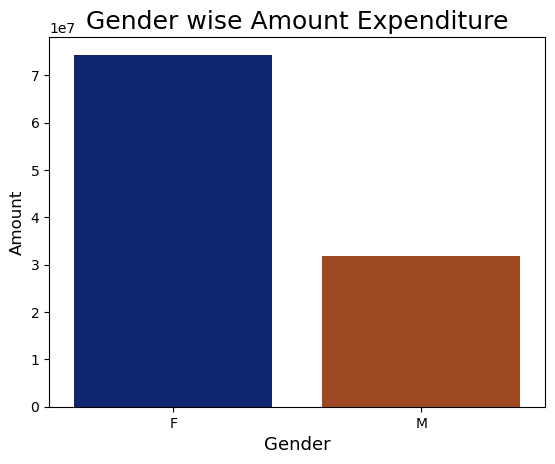

In [39]:
r2=df.groupby(["Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)
sns.barplot(x='Gender',y='Amount',data=r2,palette='dark')
plt.ylabel('Amount', fontsize=12)
plt.xlabel('Gender', fontsize=13)

plt.title('Gender wise Amount Expenditure',fontsize=18)
plt.show()

# Inference

Female expensed more than male.

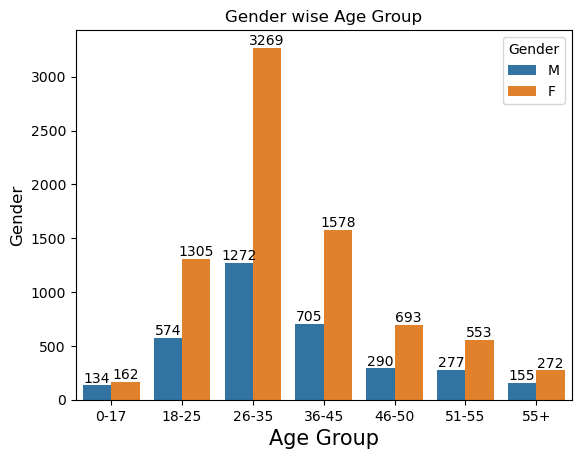

In [59]:

df_sorted = df.sort_values('Age Group', ascending=True)

r3 = sns.countplot(data=df_sorted, x='Age Group', hue='Gender')

for bars in r3.containers:
    r3.bar_label(bars)

plt.ylabel('Gender', fontsize=12)
plt.xlabel('Age Group', fontsize=15)
plt.title("Gender wise Age Group")

plt.show()


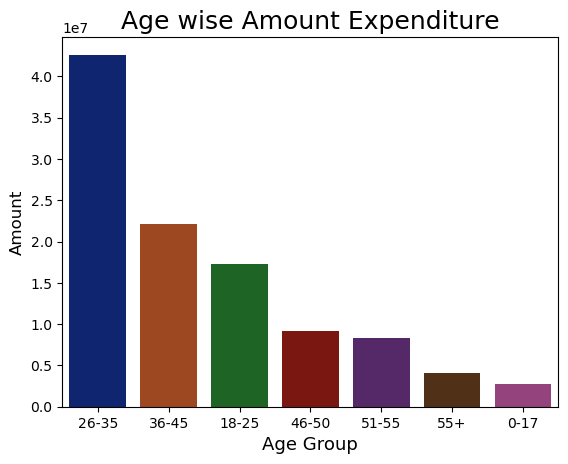

In [60]:
r2=df.groupby(["Age Group"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)
sns.barplot(x='Age Group',y='Amount',data=r2,palette='dark')
plt.ylabel('Amount', fontsize=12)
plt.xlabel('Age Group', fontsize=13)

plt.title('Age wise Amount Expenditure',fontsize=18)
plt.show()

# Inference


Female and Male age group 26-35 purchased more.

# State 

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

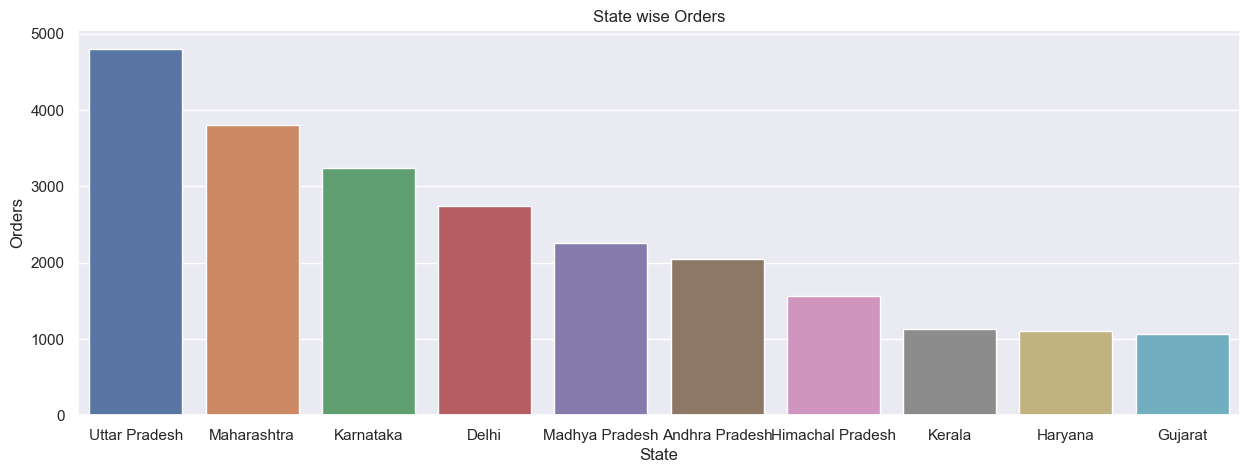

In [72]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Orders')
plt.ylabel('Orders')
plt.xlabel('State')
plt.title("State wise Orders")
plt.show()

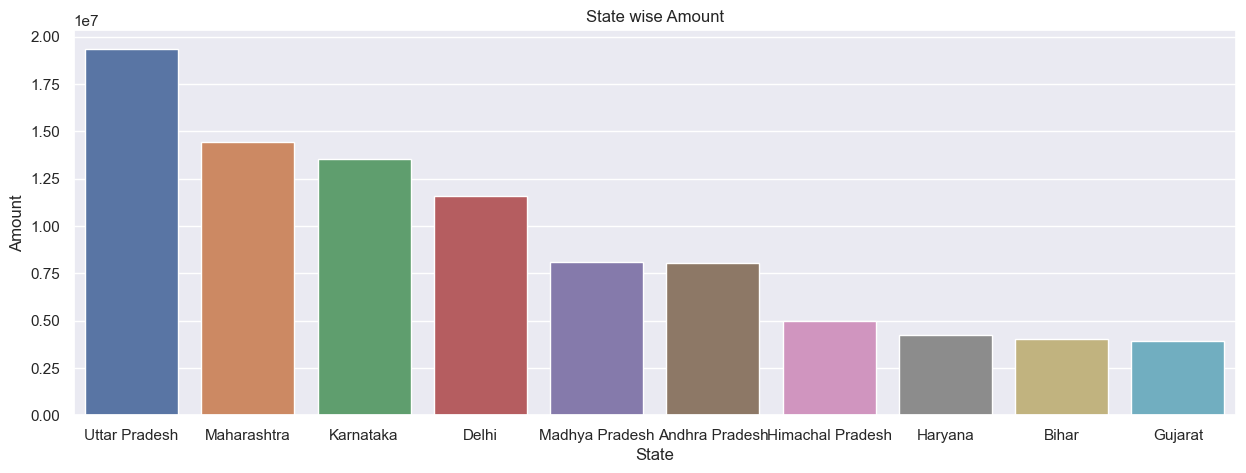

In [73]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Amount')
plt.ylabel('Amount')
plt.xlabel('State')
plt.title("State wise Amount")
plt.show()

# Inferences 

Mostly purchasing came from UP followed by Maharashtra and then Karnataka

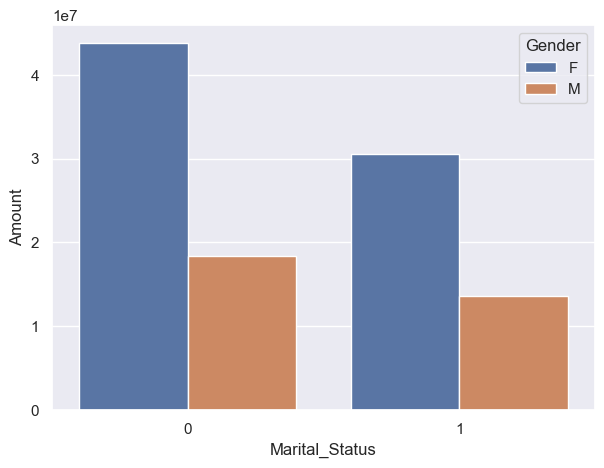

In [76]:
marital_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (7, 5)})
sns.barplot(data=marital_state, x='Marital_Status', y='Amount', hue='Gender')
plt.ylabel('Amount')
plt.xlabel('Marital_Status')
plt.show()


# Inference 

Married momen and men expense mostly

# Occupation 

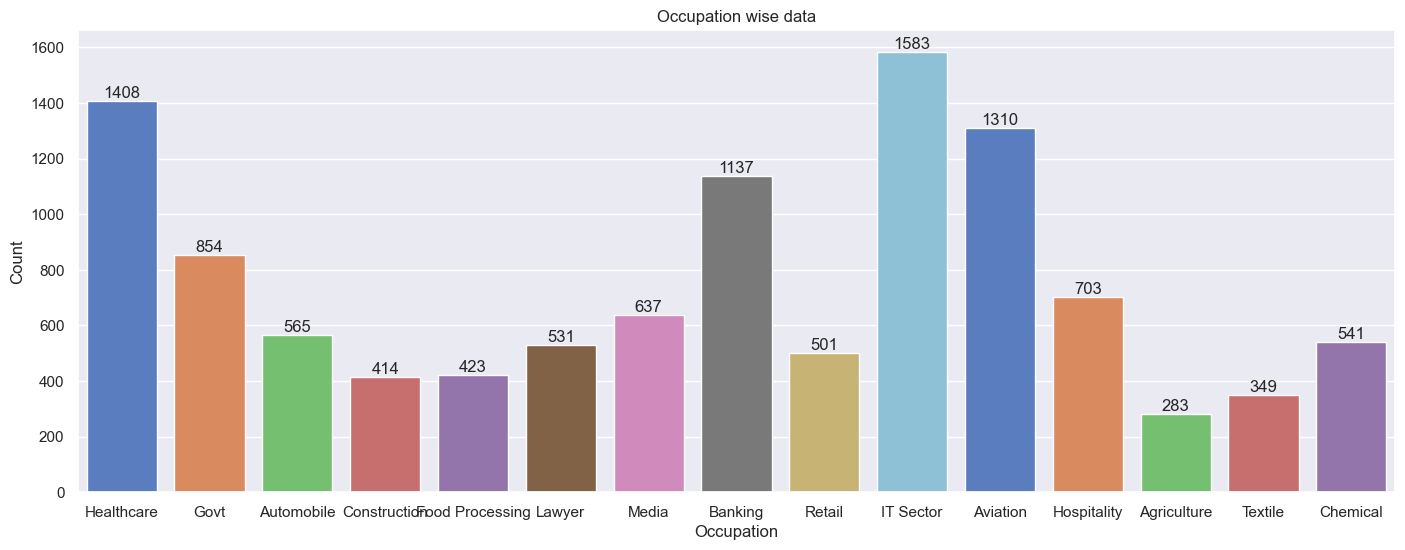

In [84]:
plt.figure(figsize=(17,6))
r4=sns.countplot(x='Occupation',data=df,palette='muted')
for bars in r4.containers:
    r4.bar_label(bars)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title("Occupation wise data")
plt.show()

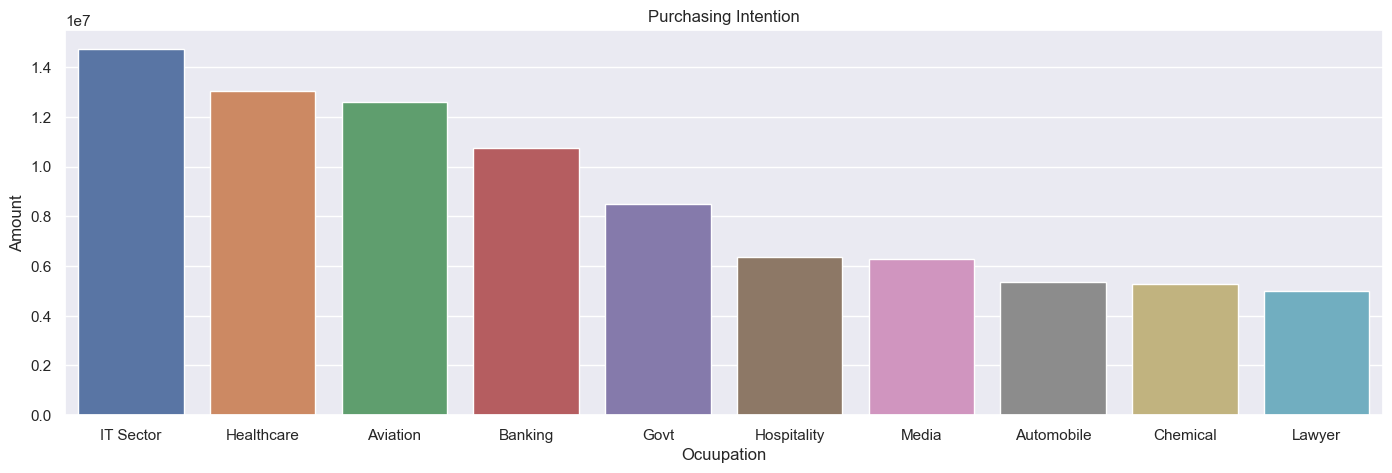

In [91]:
r4 = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (17, 5)})
sns.barplot(data=r4, x='Occupation', y='Amount')
plt.ylabel('Amount')
plt.xlabel('Ocuupation')
plt.title('Purchasing Intention')
plt.show()

# Inferences

Most buyers are from IT, Healthcare and Aviation sector

# Product Category

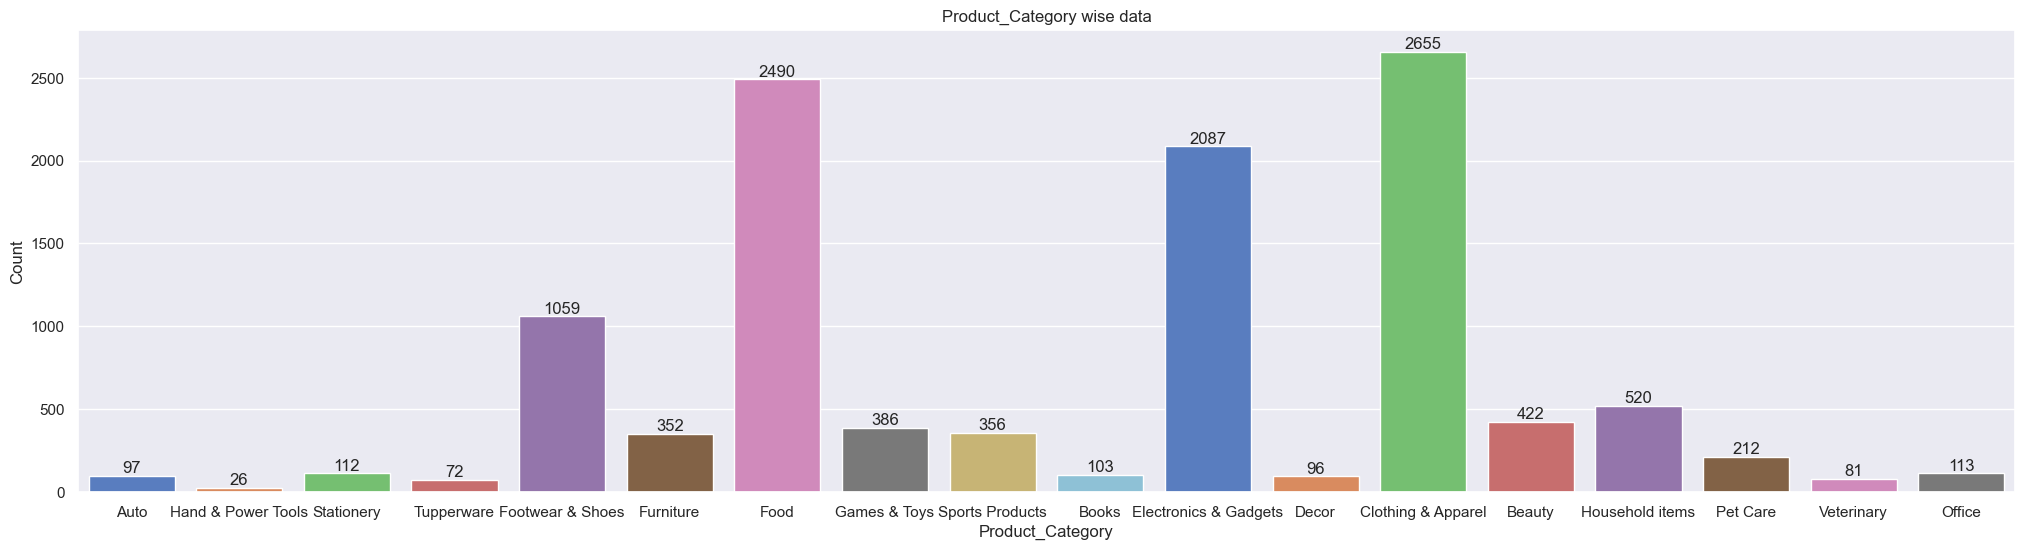

In [90]:
plt.figure(figsize=(25,6))
r4=sns.countplot(x='Product_Category',data=df,palette='muted')
for bars in r4.containers:
    r4.bar_label(bars)
plt.xlabel('Product_Category')
plt.ylabel('Count')
plt.title("Product_Category wise data")
plt.show()

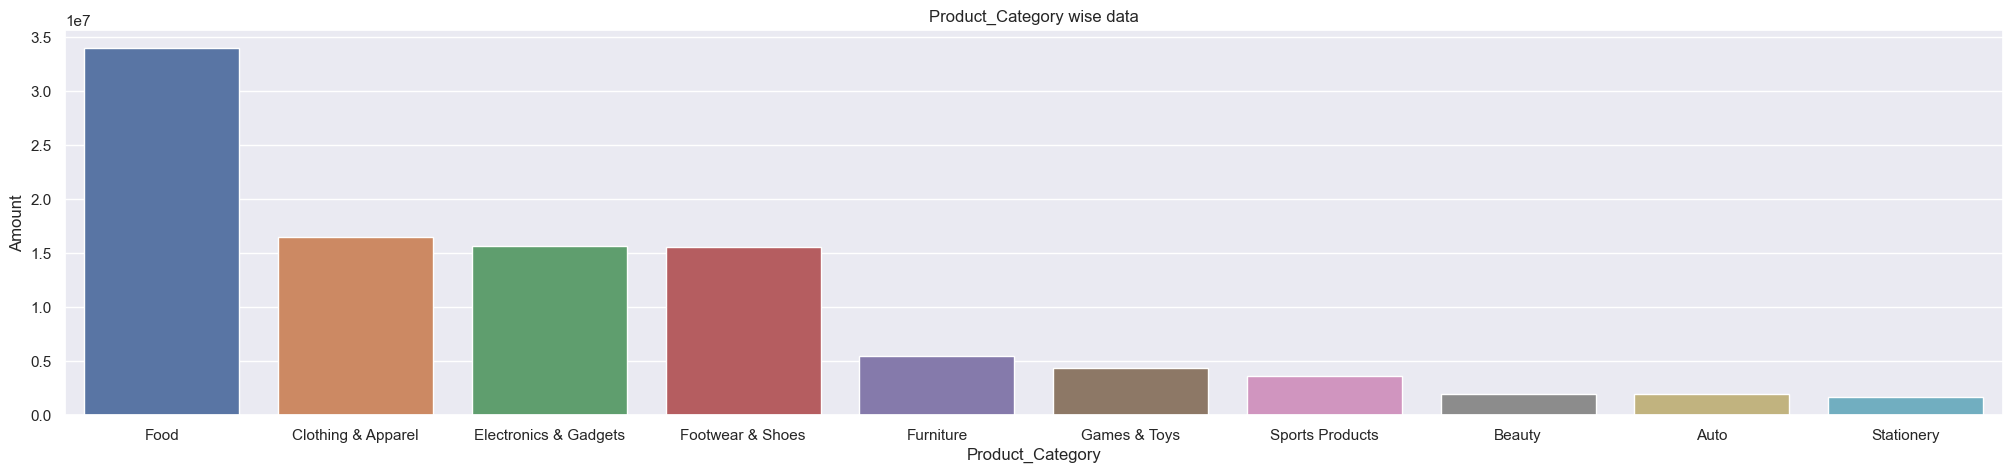

In [94]:
r5 = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (25, 5)})
sns.barplot(data=r5, x='Product_Category', y='Amount')
plt.ylabel('Amount')
plt.xlabel('Product_Category')
plt.title("Product_Category wise data")
plt.show()

# Inferences

Food, Clothing then electronics category are purchased by people mostly.

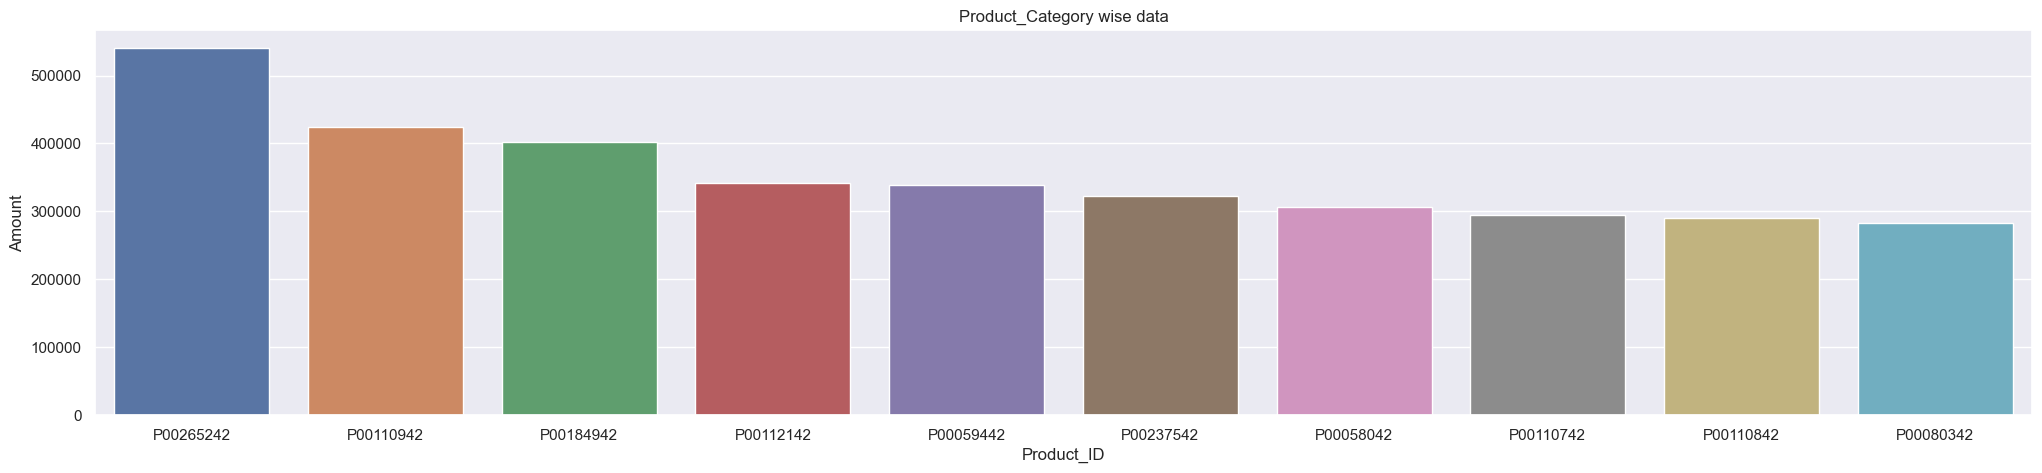

In [95]:
r5 = df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (25, 5)})
sns.barplot(data=r5, x='Product_ID', y='Amount')
plt.ylabel('Amount')
plt.xlabel('Product_ID')
plt.title("Product_Category wise data")
plt.show()

# Conclusion

1.Married women age group 26-35 years from UP, Maharashtra and Karnataka from IT, Healthcare and Aviation are more likely to
buy products from food, clothing and Electronics Category